# BLIND BOUNDED SOURCE SEPERATIONUSING NEURAL NETWORKS WITH LOCAL LEARNING RULES

This notebook is written to illustrates the numerical examples from the paper [1]. Some explanations are written for corresponding code pieces. The recurrent neural network model for blind bounded source seperation is written in WBSM.py file.

[1] Alper Erdoğan and Cengiz Pehlevan, 'Blind Bounded Source Seperation Using Neural Networks with Local Learning Rules',
ICASSP 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from WBSS import *

# Image Seperation Example 1

In [2]:
I = np.load('test_images.npy') # I contains 4 images. We will illustrate image seperation examples for both batch and online learning of the proposed model.

Below are the original source images


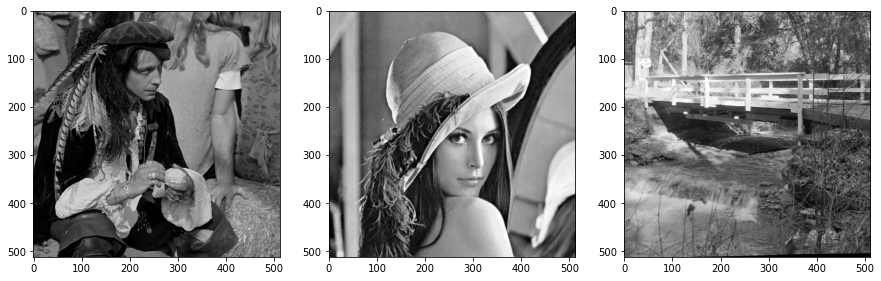

Below are the mixture signals


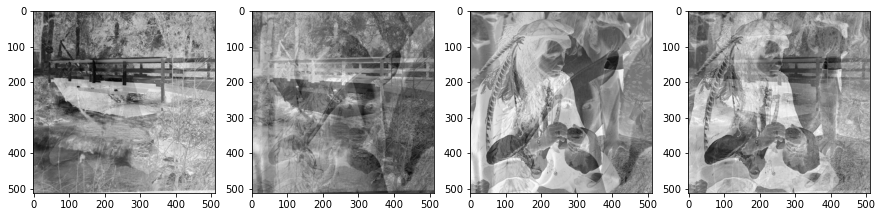

In [3]:
S1 = I[:,0:3] #Generate a source matrix from 3 images
print('Below are the original source images')
Subplot_gray_images(S1) #Imshow them to observe

A = np.random.randn(4,3)  # Uniform Mixing matrix
X = np.dot(S1, A.T)  # Generate observations
print('Below are the mixture signals')
Subplot_gray_images(ZeroOneNormalizeColumns(X)) #Imshow the mixtures to observe

In [4]:
WBSS = OnlineWBSS(s_dim = 3, x_dim = 4) # Proposed recurrent neural network model in [1]
Y = WBSS.fit_batch(X, n_epochs=3, shuffle=True) # Perform batch learning

100%|███████████████████████████████████████████████████████████████████████| 262144/262144 [00:17<00:00, 15166.21it/s]


Due to Theorem1 from [1], there is a sign and permutation ambiguity in the seperated sources, as it also happens in ICA. Therefore, we imshow both the seperated sources and the negative of the seperated sources

Below are the seperated sources


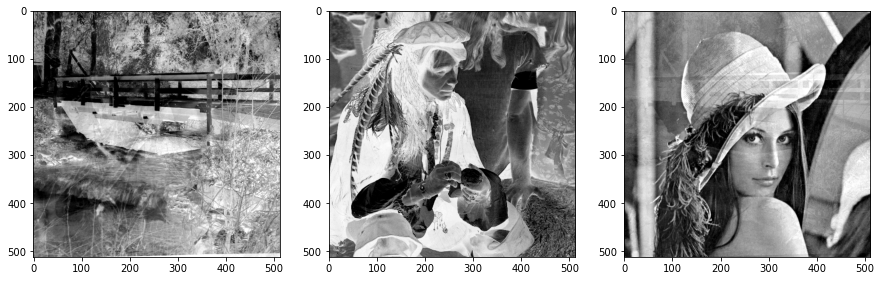

Below are the negative of the seperated sources


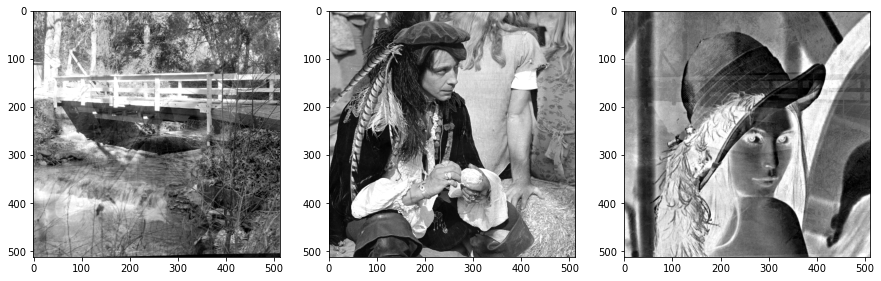

In [5]:
print('Below are the seperated sources')
Subplot_gray_images(Y)
print('Below are the negative of the seperated sources')
Subplot_gray_images(-Y)

# Image Seperation Example 2

Below are the original source images


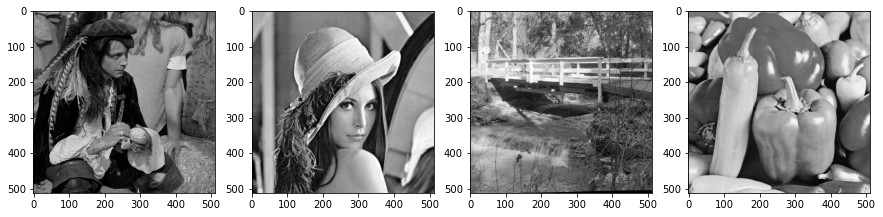

Below are the mixture signals


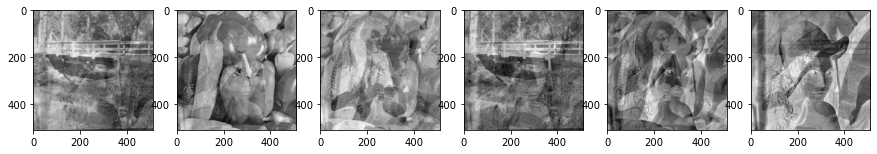

In [6]:
S2 = I # Generate a source matrix from 4 images

print('Below are the original source images')
Subplot_gray_images(S2) #Imshow them to observe

A2 = np.random.randn(6,4)  # Uniform Mixing matrix
X2 = np.dot(S2, A2.T)  # Generate observations
print('Below are the mixture signals')
Subplot_gray_images(ZeroOneNormalizeColumns(X2)) #Imshow the mixtures to observe

In [7]:
WBSS2 = OnlineWBSS(s_dim = 4, x_dim = 6) # Proposed recurrent neural network model in [1]
Y2 = WBSS2.fit_batch(X2, n_epochs=5, shuffle=True) # Perform batch learning

100%|███████████████████████████████████████████████████████████████████████| 262144/262144 [00:17<00:00, 14616.06it/s]


Below are the seperated sources


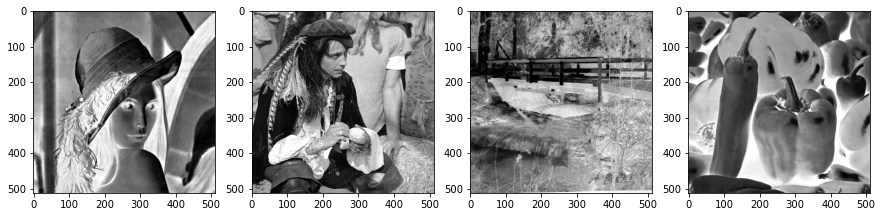

Below are the negative of the seperated sources


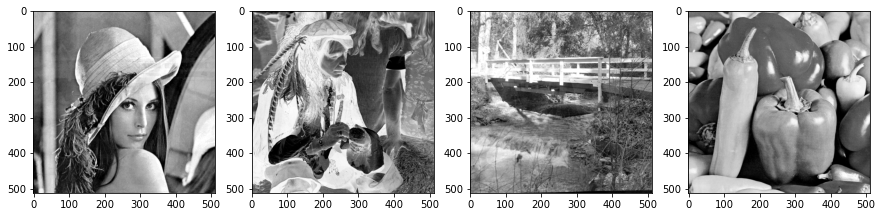

In [8]:
print('Below are the seperated sources')
Subplot_gray_images(Y2)
print('Below are the negative of the seperated sources')
Subplot_gray_images(-Y2)

# Image Seperation Example 3 (Online Learning)

Below are the mixture signals


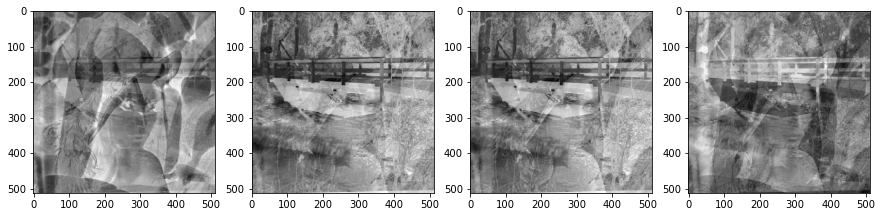

In [9]:
S3 = I[:,1:4]

A3 = np.random.randn(4,3)  # Uniform Mixing matrix
X3 = np.dot(S3, A3.T)  # Generate observations
print('Below are the mixture signals')
Subplot_gray_images(ZeroOneNormalizeColumns(X3)) #Imshow the mixtures to observe

100%|███████████████████████████████████████████████████████████████████████| 262144/262144 [00:17<00:00, 14849.84it/s]


Results after epoch 1


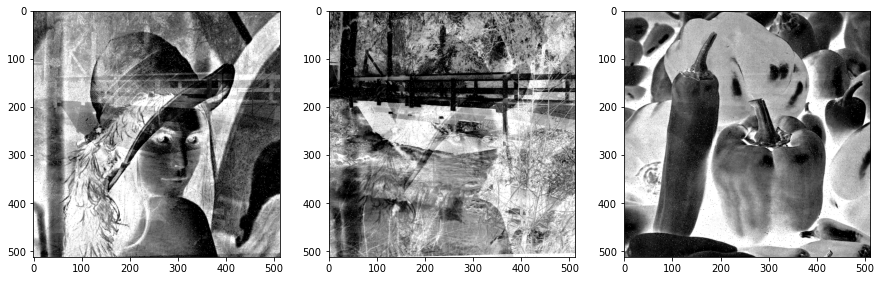

100%|███████████████████████████████████████████████████████████████████████| 262144/262144 [00:17<00:00, 14969.23it/s]


Results after epoch 2


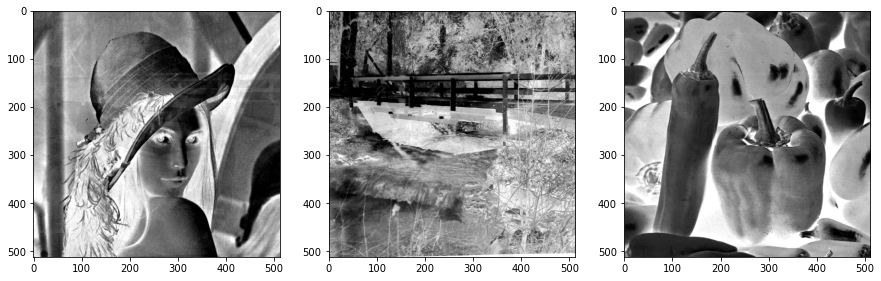

100%|███████████████████████████████████████████████████████████████████████| 262144/262144 [00:17<00:00, 14946.26it/s]


Results after epoch 3


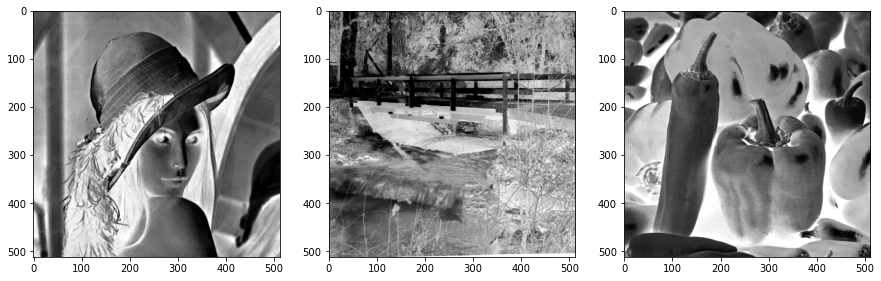

100%|███████████████████████████████████████████████████████████████████████| 262144/262144 [00:17<00:00, 14971.24it/s]


Results after epoch 4


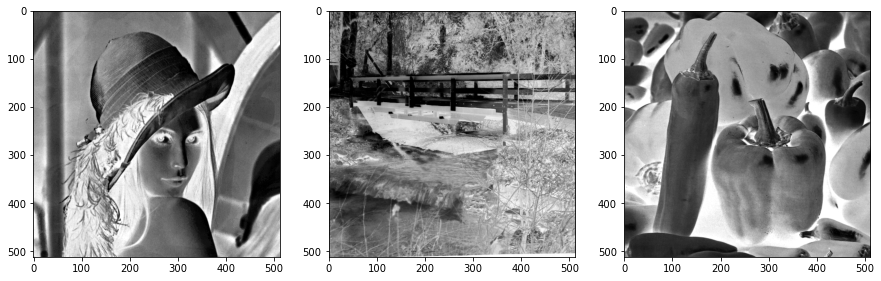

100%|███████████████████████████████████████████████████████████████████████| 262144/262144 [00:17<00:00, 14925.80it/s]


Results after epoch 5


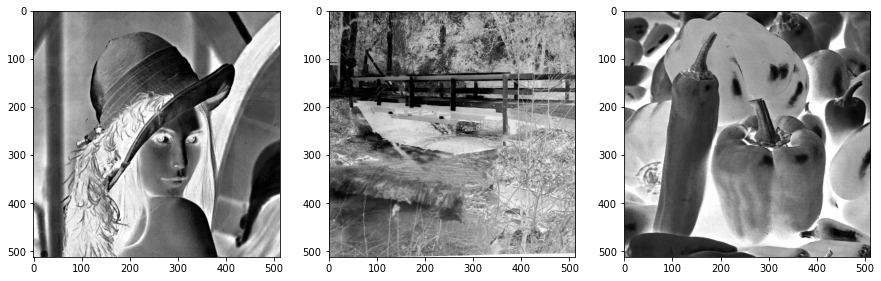

In [18]:
s_dim = 3 # Required dimension of sources
x_dim = 4 # Dimension of the mixture signals
samples = X3.shape[0] # Number of samples
epochs = 5 # Number of epochs 
idx = np.random.permutation(samples) # random permutation
Y3 = np.zeros((X3.shape[0], s_dim)) # Generate an empty array for source estimations
X_white = whiten_signal(X3, type_ = 2)[0] # Assuming online source samples are whitened.

WBSS3 = OnlineWBSS(s_dim = s_dim, x_dim = x_dim) 

for k in range(epochs):
    for i_sample in tqdm(range(samples)):
        x_current = X_white[idx[i_sample],:] # Take one data sample
        
        y = WBSS3.fit_next(x_current) # Perform neural updates
        
        Y3[idx[i_sample],:] = y # Return the current source estimation

    print('Results after epoch {}'.format(k+1))
    Subplot_gray_images(Y3) # See the result after each epochs

Below are the seperated sources


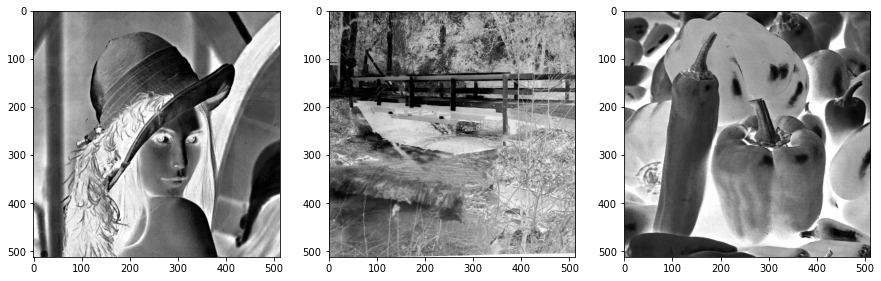

Below are the negative of the seperated sources


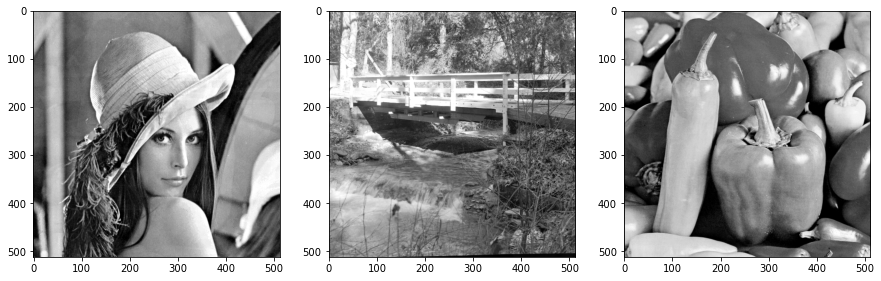

In [19]:
print('Below are the seperated sources')
Subplot_gray_images(Y3)
print('Below are the negative of the seperated sources')
Subplot_gray_images(-Y3)

# 1D Signal Seperation (Batch Learning)

In [12]:
from scipy.stats import ortho_group

In [13]:
S4 = np.zeros((50,3))
S4[:,0] = np.random.uniform(0,2,50)
S4[:,1] = np.random.uniform(0,3,50)
S4[:,2] = np.random.uniform(0,4,50)

Below are the original sources


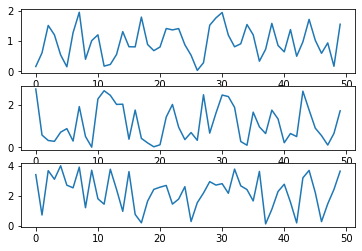

In [14]:
print('Below are the original sources')
fig, ax = plt.subplots(3)
for i in range(S4.shape[1]):
    ax[i].plot(S4[:,i])
plt.show()

Below are the mixture signals


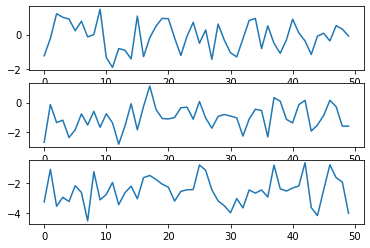

In [15]:
A4 = ortho_group.rvs(3)
X4 = np.dot(S4, A4.T)  # Generate observations

print('Below are the mixture signals')
fig, ax = plt.subplots(3)
for i in range(X4.shape[1]):
    ax[i].plot(X4[:,i])

In [16]:
WBSS4 = OnlineWBSS(s_dim = 3, x_dim = 3)
Y4 = WBSS4.fit_batch(X4, n_epochs = 4000, verbose = False)

Below are the seperated sources


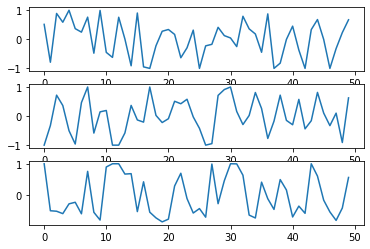

In [17]:
print('Below are the seperated sources')
fig, ax = plt.subplots(3)
for i in range(Y4.shape[1]):
    ax[i].plot(Y4[:,i])